# Set Up Environment

In [2]:
import os, sys
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import TwoSlopeNorm
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

# 

# Read isoTOP File

In [3]:
df = pd.read_csv('../data/isotop_descriptors.csv')

In [4]:
df.shape

(1371, 82)

In [5]:
df.columns.to_list()

['hbond_don_sc_atom_5_P',
 'hbond_acc_sc_atom_5_P',
 'hbond_don_bb_atom_5_P',
 'hbond_acc_bb_atom_5_P',
 'hbond_don_sc_atom_5_7.5_P',
 'hbond_acc_sc_atom_5_7.5_P',
 'hbond_don_bb_atom_5_7.5_P',
 'hbond_acc_bb_atom_5_7.5_P',
 'saas_P_7.5',
 'b_factor',
 'disorder',
 'ss_helix',
 'ss_beta',
 'ss_loop',
 'disulfide_bridge',
 'pocket',
 '1D_prox_left_7.5',
 '1D_prox_right_7.5',
 '3D_prox_right_7.5',
 'steric_P_7.5',
 'HPB_P_7.5',
 'DON_P_7.5',
 'ACP_P_7.5',
 'ARM_P_7.5',
 'POS_P_7.5',
 'NEG_P_7.5',
 'SSB_P_7.5',
 'ARO_STACK_P_7.5',
 'HB_P_7.5',
 'HYDROPHOBIC_P_7.5',
 'REPULSIVE_P_7.5',
 'SALT_BRIDGES_P_7.5',
 'P_P_7.5',
 'ARO_P_7.5',
 'ALI_P_7.5',
 'A_P_7.5',
 'B_P_7.5',
 'CYS_P_7.5',
 'ASP_P_7.5',
 'SER_P_7.5',
 'GLN_P_7.5',
 'LYS_P_7.5',
 'ILE_P_7.5',
 'PRO_P_7.5',
 'THR_P_7.5',
 'PHE_P_7.5',
 'ASN_P_7.5',
 'GLY_P_7.5',
 'HIS_P_7.5',
 'LEU_P_7.5',
 'ARG_P_7.5',
 'TRP_P_7.5',
 'ALA_P_7.5',
 'VAL_P_7.5',
 'GLU_P_7.5',
 'TYR_P_7.5',
 'MET_P_7.5',
 'fa_atr',
 'fa_rep',
 'fa_sol',
 'fa_intra_

# 

# Plot Pearson Correlations

In [6]:
heatmap_df = df.drop(columns = ['reactivity']).corr()
heatmap_df.head()

C:\Users\Onee-sama\AppData\Local\Temp\ipykernel_23056\3686457866.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap_df = df.drop(columns = ['reactivity']).corr()


,hbond_don_sc_atom_5_P,hbond_acc_sc_atom_5_P,hbond_don_bb_atom_5_P,hbond_acc_bb_atom_5_P,hbond_don_sc_atom_5_7.5_P,hbond_acc_sc_atom_5_7.5_P,hbond_don_bb_atom_5_7.5_P,hbond_acc_bb_atom_5_7.5_P,saas_P_7.5,b_factor,...,omega,fa_dun,p_aa_pp,rama_prepro,buriedness,pka_desolvation,pka_hb,pka_hb_bb,pka_hb_elec,ratio_mean
hbond_don_sc_atom_5_P,1.000000,0.570614,-0.051751,-0.168008,0.063839,0.076292,-0.063976,0.009329,-0.009204,-0.035378,...,-0.006116,-0.023721,0.046303,0.053434,-0.028465,-0.028471,0.027370,0.027370,0.012186,-0.012042
hbond_acc_sc_atom_5_P,0.570614,1.000000,0.026462,-0.169091,0.097976,0.072474,-0.047930,0.038946,0.064755,-0.060131,...,-0.016630,-0.005572,0.046699,-0.017452,-0.027982,-0.027988,0.026907,0.026907,0.011980,-0.001053
hbond_don_bb_atom_5_P,-0.051751,0.026462,1.000000,0.186269,0.134758,0.172653,-0.371294,0.161369,0.256842,-0.089767,...,-0.019595,-0.032591,-0.108617,-0.013480,0.053320,0.053337,-0.051033,-0.051033,-0.021959,0.059570
hbond_acc_bb_atom_5_P,-0.168008,-0.169091,0.186269,1.000000,-0.079819,-0.039174,0.172368,-0.246088,0.125541,-0.063930,...,0.065947,-0.097627,-0.158475,-0.044852,0.061577,0.061378,-0.067275,-0.067275,-0.055974,0.163629
hbond_don_sc_atom_5_7.5_P,0.063839,0.097976,0.134758,-0.079819,1.000000,0.593523,-0.163515,-0.033122,0.243124,0.017267,...,0.003199,0.002055,0.089807,0.037387,0.001741,0.001696,-0.003409,-0.003409,-0.007114,-0.104826


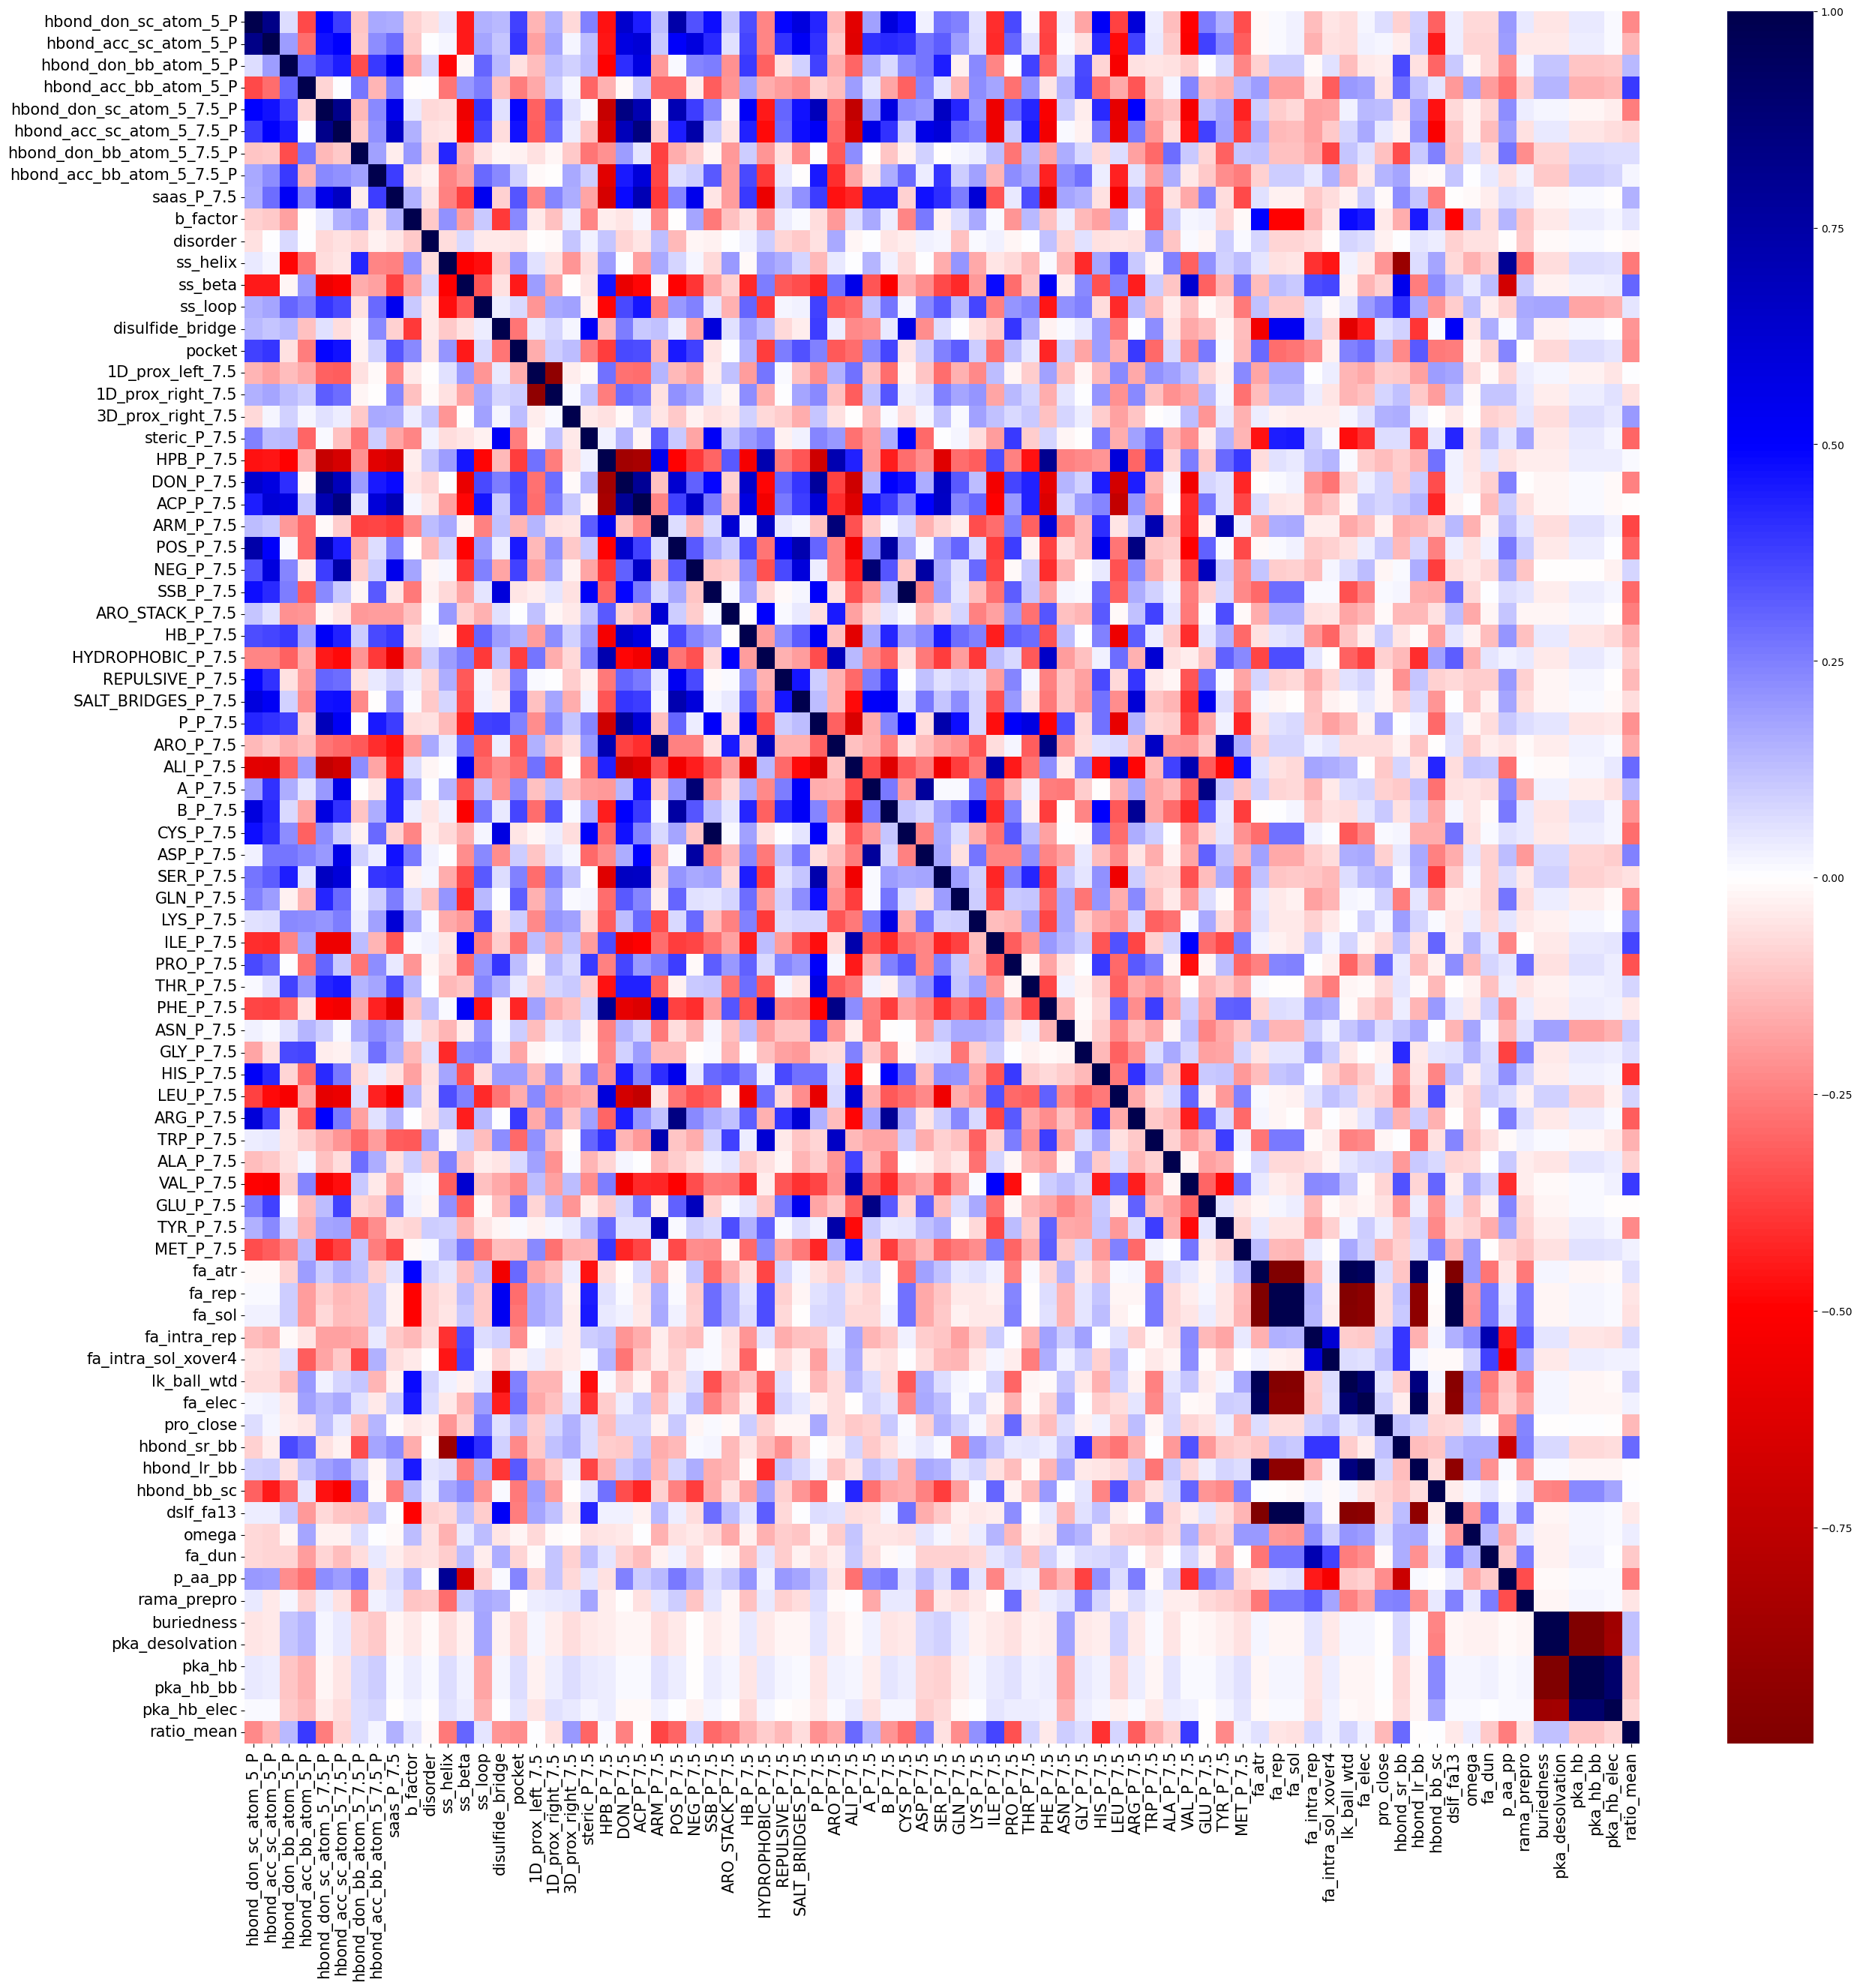

In [7]:
wc_heatmap_df = heatmap_df.copy()
    
plt.figure(figsize = (30, 30))
sns.heatmap(wc_heatmap_df.corr(), fmt = '.1g', cmap="seismic_r")
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.show()